<a href="https://colab.research.google.com/github/Atharva-Waghmare/Deep_Learning/blob/main/practicing_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from fastai.vision.all import *
path=untar_data(URLs.PASCAL_2007)

In [4]:
import pandas as pd
df=pd.read_csv(path/'train.csv')
df.head()

,fname,labels,is_valid
0,000005.jpg,chair,True
1,000007.jpg,car,True
2,000009.jpg,horse person,True
3,000012.jpg,car,False
4,000016.jpg,bicycle,True


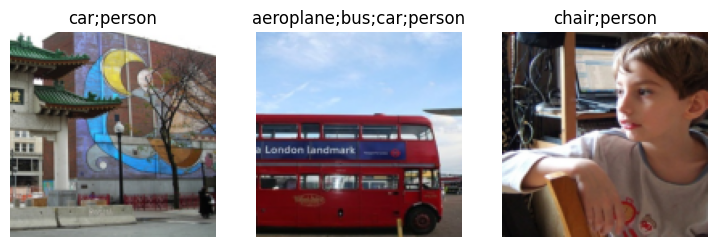

In [11]:
def splitter(df):
  train=df.index[~df['is_valid']].tolist()
  valid=df.index[df['is_valid']].tolist()
  return train,valid
def get_x(r) : return path/'train'/r['fname']
def get_y(r) : return r['labels'].split(' ')
dblock=DataBlock(blocks=(ImageBlock,MultiCategoryBlock),splitter=splitter,get_x=get_x,get_y=get_y,item_tfms=RandomResizedCrop(128,min_scale=0.35))
dls=dblock.dataloaders(df)
dls.show_batch(nrows=1,ncols=3)

In [12]:
learn=cnn_learner(dls,resnet18)

/usr/local/lib/python3.11/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 43.5MB/s]


In [14]:
def binary_cross_entropy(inputs, targets):
  inputs = inputs.sigmoid()
  return -torch.where(targets==1, inputs, 1-inputs).log().mean()